In [25]:
# 📊 Netflix Titles - Exploratory Data Analysis (EDA)

# This project analyzes a Netflix dataset to understand the distribution of movies and TV shows,
# their ratings, countries of origin, and other key features. The goal is to uncover patterns
# and generate insights about the content available on the platform.

In [45]:
# 📦 Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from collections import Counter

sns.set(style='whitegrid')

In [27]:
# 📂 Load Dataset

df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [28]:
# 🧾 Dataset Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [29]:
df.isnull().sum()  # null values

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [30]:
# 🧹 Data Cleaning

# - Remove duplicates
# - Clean and convert `date_added` to datetime
# - Drop rows with missing essential values

df.drop_duplicates(inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df_clean = df.dropna(subset=['title', 'type'], inplace=True)


/tmp/ipython-input-31-608007572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


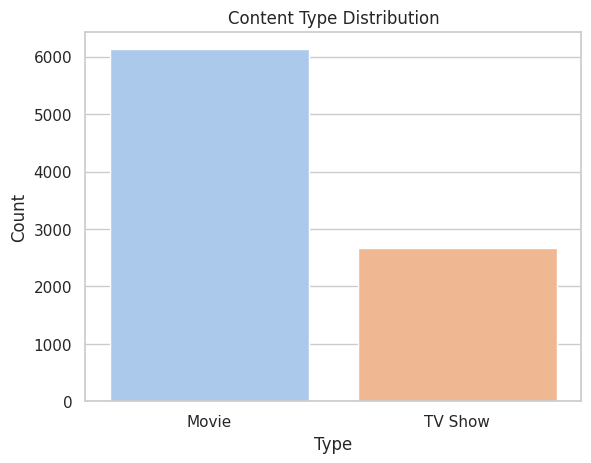

In [31]:
# 📈 Content type

sns.countplot(data=df, x='type', palette='pastel')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


/tmp/ipython-input-32-2017316052.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')


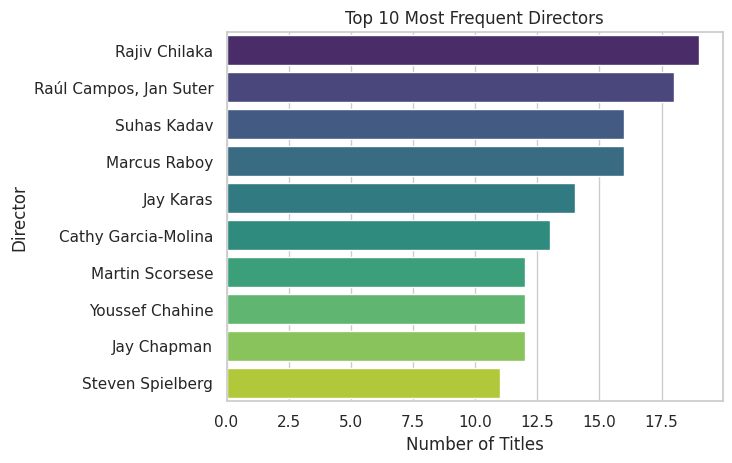

In [32]:
# 📈 Top 10 Most Frequent Directors

top_directors = df['director'].value_counts().dropna().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


/tmp/ipython-input-49-518936620.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


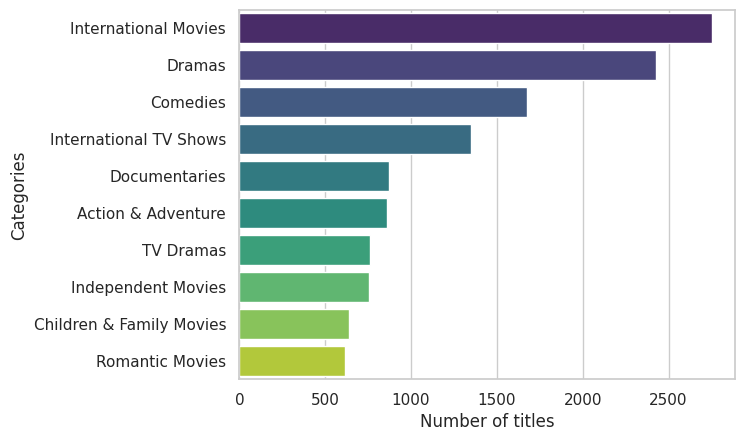

In [49]:
# Top 10 Categories


categories = df['listed_in'].str.split(', ')
all_categories = [cat for sublist in categories for cat in sublist]
top_categories = pd.Series(Counter(all_categories)).sort_values(ascending=False).head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.xlabel('Number of titles')
plt.ylabel('Categories')
plt.show()

/tmp/ipython-input-33-112011936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')


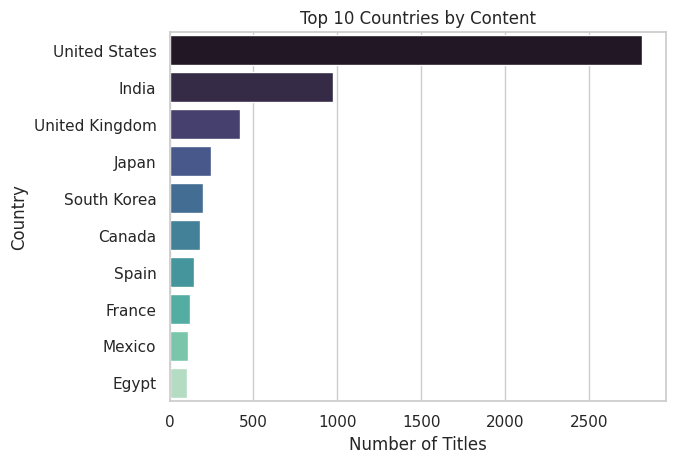

In [33]:
# 📈 Top 10 Countries Producing Content

top_countries = df['country'].value_counts().dropna().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, palette='mako')
plt.title('Top 10 Countries by Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


/tmp/ipython-input-50-4194196020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().head(14).index, palette='coolwarm')


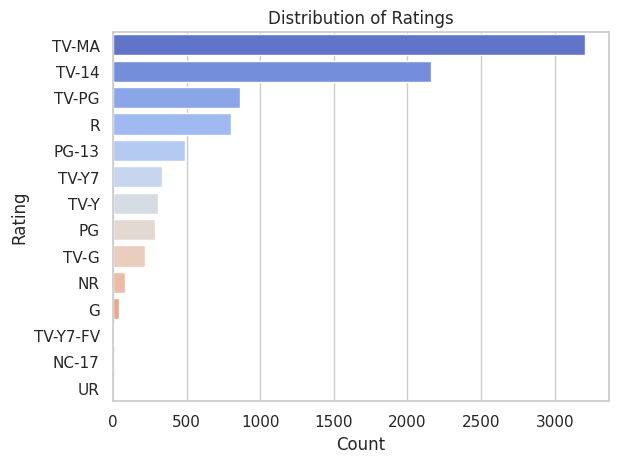

In [50]:
# 📈 Rating Distribution

sns.countplot(data=df, y='rating', order=df['rating'].value_counts().head(14).index, palette='coolwarm')
plt.title('Distribution of Ratings')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


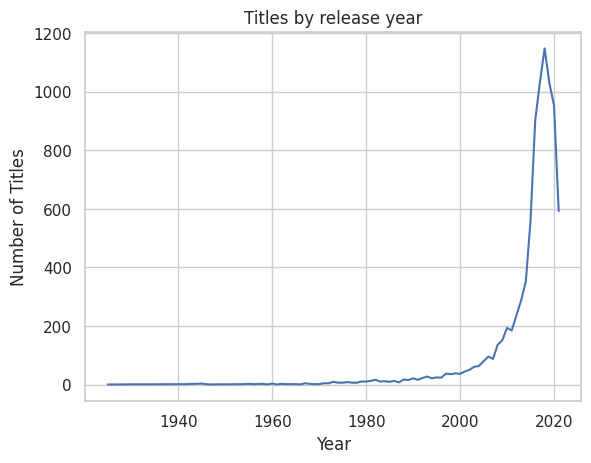

In [56]:
# Titles by release year

df['release_year'].value_counts().sort_index().plot(kind='line', title='Titles by release year')
plt.xlabel('Year')
plt.ylabel('Number of titles')
plt.show()

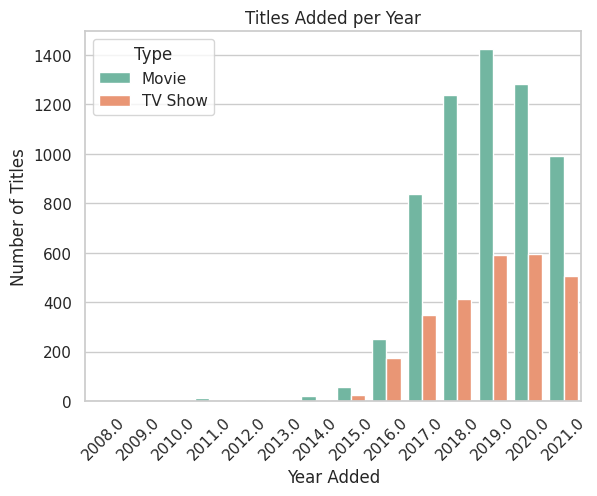

In [35]:
# 📈 Titles added per year classified by type

df['year_added'] = df['date_added'].dt.year

sns.countplot(data=df, x='year_added', hue='type', palette='Set2')
plt.title('Titles Added per Year')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


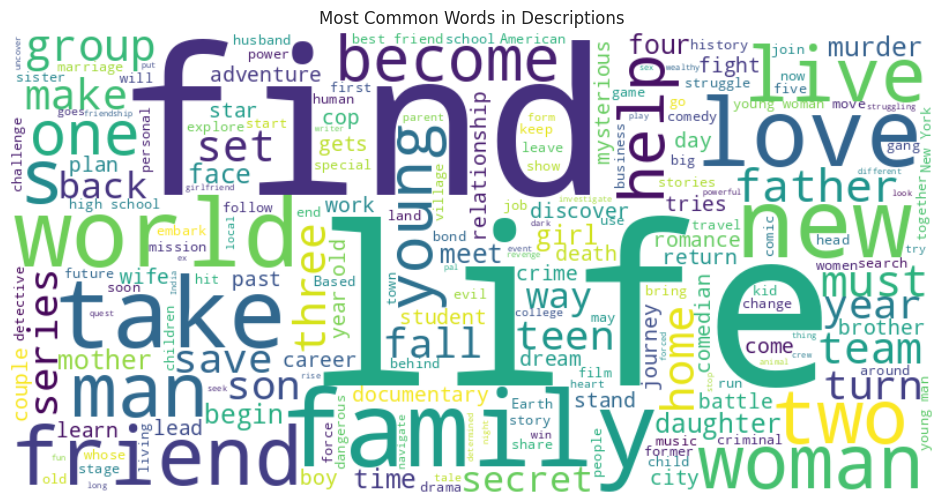

In [36]:
# ☁️ Word Cloud of Descriptions

text = ' '.join(df['description'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Descriptions')
plt.show()


In [57]:
# ✅ Conclusions

from IPython.display import Markdown

Markdown('''
**Key Insights:**

- Movies outnumber TV shows in the Netflix catalog.
- Most titles originate from the US and India.
- "TV-MA" is the most frequent content rating.
- Content additions peaked in 2019.
- The volume of content added peaked in 2019.
- The number of releases has decreased since 2020, likely due to the onset of the COVID-19 pandemic.
- Common themes in descriptions life, find, family, love, friend, world.

This EDA provides useful insights into Netflix's content and can serve as a basis for deeper analysis.
''')



**Key Insights:**

- Movies outnumber TV shows in the Netflix catalog.
- Most titles originate from the US and India.
- "TV-MA" is the most frequent content rating.
- Content additions peaked in 2019.
- The volume of content added peaked in 2019.
- The number of releases has decreased since 2020, likely due to the onset of the COVID-19 pandemic.
- Common themes in descriptions life, find, family, love, friend, world.

This EDA provides useful insights into Netflix's content and can serve as a basis for deeper analysis.
